In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as tud
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import warnings
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
np.random.seed(0)

from community import community_louvain
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np

In [4]:
# 导入graph
G = nx.read_edgelist('../graph/whole_undirected_graph.g')

## Nodes and Edges

In [113]:
nodes = list(G.nodes)
print(len(nodes))

2826


In [114]:
edges = list(G.edges)
print(len(edges))

7496


## Centrality

refer to: 

https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html

https://github.com/TrueNobility303/network-machine-learning/blob/master/network%20analysis/center.py等

In [112]:
# 定义提取中心度topk的地点及其中心度的函数
def centrality_top(G,method='degree',k=10):
    # method定义中心性度量方式，h和l用于标记图中具有较高中心性的点
    
    if method == 'degree':
        # 度中心性
        dict = nx.degree_centrality(G)
        
    elif method == 'eigenvector':
        # 特征向量中心性
        dict = nx.eigenvector_centrality(G)
        
    elif method == 'katz':
        # Katz中心性
        w, v = np.linalg.eig(nx.to_numpy_matrix(G))
        rho = max(abs(w))
        alpha = 0.85/rho
        dict = nx.katz_centrality(G,alpha,beta=1)
        
    elif method == 'pagerank':
        # pagerank中心性
        dict = nx.pagerank(G,alpha=0.85)
        
    elif method == 'betweenness':
        # 中间中心性
        dict = nx.betweenness_centrality(G)
        
    elif method == 'closeness':
        # 接近中心性
        dict = nx.closeness_centrality(G)
    
    centrality_sorted = sorted(dict.items(), key=lambda d: d[1], reverse=True)
    print(method, "centrality top",k,':\n',centrality_sorted[0:k],'\n')
    
# 计算
centrality_top(G,method='degree',k=10)
centrality_top(G,method='eigenvector',k=10)
centrality_top(G,method='katz',k=10)
centrality_top(G,method='pagerank',k=10)
centrality_top(G,method='betweenness',k=10)
centrality_top(G,method='closeness',k=10)

degree centrality top 10 :
 [('北京', 0.018761061946902656), ('沈阳', 0.017699115044247787), ('沈阳北', 0.016283185840707964), ('郑州', 0.01592920353982301), ('哈尔滨', 0.015221238938053097), ('石家庄', 0.015221238938053097), ('广州南', 0.014867256637168142), ('杭州东', 0.014867256637168142), ('九江', 0.014867256637168142), ('郑州东', 0.01415929203539823)] 

eigenvector centrality top 10 :
 [('北京', 0.27774142174297173), ('沈阳北', 0.27677746785490753), ('沈阳', 0.24436005538568906), ('天津', 0.22757744599868063), ('山海关', 0.1981253356583668), ('天津西', 0.18404086359261737), ('秦皇岛', 0.1638542323934145), ('唐山', 0.15203749747998083), ('营口东', 0.13762200969415248), ('石家庄', 0.13723521663505006)] 

katz centrality top 10 :
 [('北京', 0.019794842543916443), ('沈阳', 0.019727913338662563), ('沈阳北', 0.019649030487888738), ('郑州', 0.019627994766216933), ('石家庄', 0.019588673732596814), ('哈尔滨', 0.01958430740700017), ('杭州东', 0.01956540382622251), ('广州南', 0.019565327276201337), ('九江', 0.019564322283768518), ('郑州东', 0.01952503220413101)] 

pag

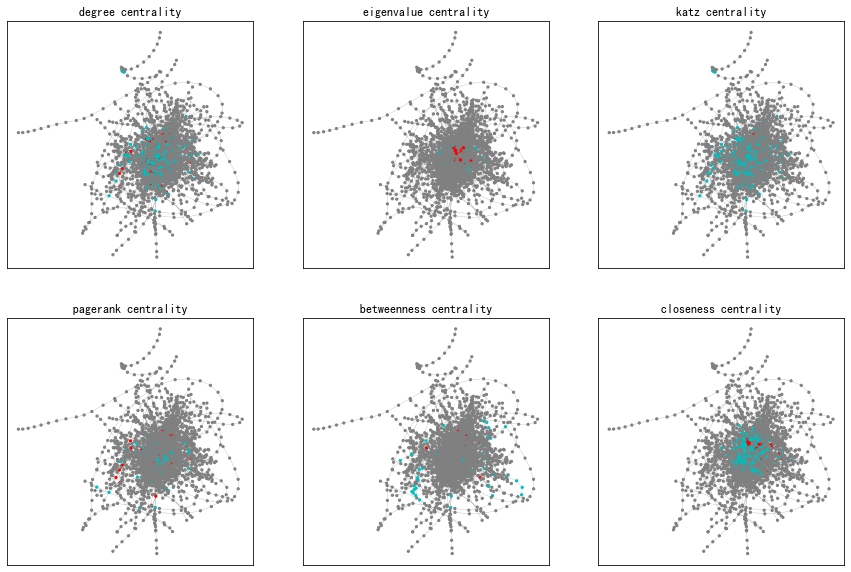

In [103]:
# 定义绘制标记中心度较高的点的图像的函数
def centrality_fig(G, pos, method='degree',h=0.5,l=0.2):
    # method定义中心性度量方式，h和l用于标记图中具有较高中心性的点
    
    if method == 'degree':
        # 度中心性
        dict = nx.degree_centrality(G)
        
    elif method == 'eigenvector':
        # 特征向量中心性
        dict = nx.eigenvector_centrality(G)
        
    elif method == 'katz':
        # Katz中心性
        w, v = np.linalg.eig(nx.to_numpy_matrix(G))
        rho = max(abs(w))
        alpha = 0.85/rho
        dict = nx.katz_centrality(G,alpha,beta=1)
        
    elif method == 'pagerank':
        # pagerank中心性
        dict = nx.pagerank(G,alpha=0.85)
        
    elif method == 'betweenness':
        # 中间中心性
        dict = nx.betweenness_centrality(G)
        
    elif method == 'closeness':
        # 接近中心性
        dict = nx.closeness_centrality(G)
    
    max_center_value = max(dict.values())
    
    # 用图像颜色区分中心度较高的节点
    color = []
    for i in dict.keys():
        if dict[i] > max_center_value * h:
            color.append("r")
        elif dict[i] > max_center_value * l:
            color.append("c")
        else:
            color.append([0.5, 0.5, 0.5])  # grey
    
    nx.draw_networkx_nodes(G, pos, node_size=5, node_color=color)
    nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.5)

    
# 绘图
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(231)
ax1.set_title("degree centrality")
centrality_fig(G, pos, method='degree',h=0.2,l=0.1)
ax2 = fig.add_subplot(232)
ax2.set_title("eigenvector centrality")
centrality_fig(G, pos, method='eigenvector',h=0.1,l=0.05)
ax3 = fig.add_subplot(233)
ax3.set_title("katz centrality")
centrality_fig(G, pos, method='katz',h=0.97,l=0.95)
ax4 = fig.add_subplot(234)
ax4.set_title("pagerank centrality")
centrality_fig(G, pos, method='pagerank',h=0.3,l=0.2)
ax5 = fig.add_subplot(235)
ax5.set_title("betweenness centrality")
centrality_fig(G, pos, method='betweenness',h=0.05,l=0.02)
ax6 = fig.add_subplot(236)
ax6.set_title("closeness centrality")
centrality_fig(G, pos, method='closeness',h=0.8,l=0.7)

## degree distribution

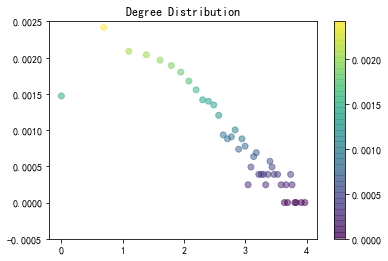

In [31]:
degree_hist = nx.degree_histogram(G)

def plot_degree(degree_hist):
    x = np.log(range(len(degree_hist)))
    y = [np.log(z) / float(sum(degree_hist)) for z in degree_hist]
    plt.scatter(x, y, c=y, linewidth=1, marker='o', alpha=0.5)
    plt.colorbar()
    plt.ylim(-0.0005, 0.0025)
    plt.title("log-log Degree Distribution")
    plt.show()
    
plot_degree(degree_hist) 

## Other features 

In [49]:
# average degree
degree = []
for i,j in list(G.degree):
    degree.append(j)
avg_deg = sum(degree)/len(degree)
print("Average degree:", avg_deg)

# clustering coefficient
clus = nx.average_clustering(G)
print("Clustering:", clus)

# transitivity
trans = nx.transitivity(G)
print("Transitivity:", trans)

Average degree: 5.305024769992923
Clustering: 0.4733884186052142
Transitivity: 0.3381798297884273


## analysis for maximum connected subgraph

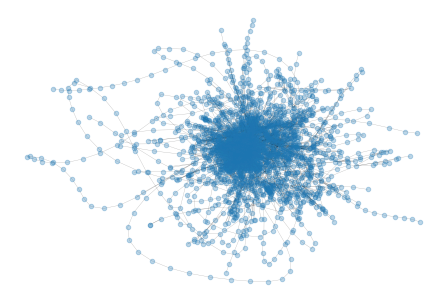

In [23]:
C = sorted(nx.connected_components(G), key=len, reverse=True)
G_maxsub = G.subgraph(C[0])
nx.draw_spring(G_maxsub, node_size=20, width=0.3, alpha=0.3, with_labels=False)
plt.show()

In [50]:
# number of nodes
nodes = list(G_maxsub.nodes)
print("Nodes:",len(nodes))

# number of edges
edges = list(G_maxsub.edges)
print("Edges:",len(edges))

# average degree
degree = []
for i,j in list(G_maxsub.degree):
    degree.append(j)
avg_deg = sum(degree)/len(degree)
print("Average degree:", avg_deg)

# clustering coefficient
clus = nx.average_clustering(G_maxsub)
print("Clustering:", clus)

# transitivity
trans = nx.transitivity(G_maxsub)
print("Transitivity:", trans)

Nodes: 2762
Edges: 7381
Average degree: 5.344677769732078
Clustering: 0.4760009842858013
Transitivity: 0.33621200575734483


In [51]:
# Average distance
ave_len = nx.average_shortest_path_length(G_maxsub)
print("Average distance:", ave_len)

# Diameter
Diameter = nx.diameter(G_maxsub)
print("Diameter:", Diameter)

# density
n = len(nodes)
density = len(G_maxsub.edges())*2/n/(n-1)
print("Density:", density)

Average distance: 7.918594858929104
Diameter: 47
Density: 0.0019357760846548634


能不能对上某个模型特征？

## random_evolution（弃用）

In [52]:
"""import networkx as nx
import matplotlib.pyplot as plt
import math

n = 500
G = nx.random_graphs.erdos_renyi_graph(n, 0)
pos = nx.spring_layout(G)

for c in [0.05, 0.5, 1, 5, 50]:
    G = nx.random_graphs.erdos_renyi_graph(n, c/(n-1))

    subG = G.subgraph(max(nx.connected_components(G),key=len))

    Clus = nx.average_clustering(subG)
    print("Clustering:", Clus)

    # Average distance
    ave_len = nx.average_shortest_path_length(subG)
    print("Average distance:", ave_len)

    # Diameter
    Diameter = nx.diameter(subG)
    print("Diameter:", Diameter)

    # Size
    size = len(subG.nodes())
    print("Size:", size)

    # Average degree
    ave_deg = len(G.edges())*2/n
    print("Average degree:", ave_deg)

    nx.draw_networkx_nodes(G, pos, node_size=15)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()"""
    pass

'import networkx as nx\nimport matplotlib.pyplot as plt\nimport math\n\nn = 500\nG = nx.random_graphs.erdos_renyi_graph(n, 0)\npos = nx.spring_layout(G)\n\nfor c in [0.05, 0.5, 1, 5, 50]:\n    G = nx.random_graphs.erdos_renyi_graph(n, c/(n-1))\n\n    subG = G.subgraph(max(nx.connected_components(G),key=len))\n\n    Clus = nx.average_clustering(subG)\n    print("Clustering:", Clus)\n\n    # Average distance\n    ave_len = nx.average_shortest_path_length(subG)\n    print("Average distance:", ave_len)\n\n    # Diameter\n    Diameter = nx.diameter(subG)\n    print("Diameter:", Diameter)\n\n    # Size\n    size = len(subG.nodes())\n    print("Size:", size)\n\n    # Average degree\n    ave_deg = len(G.edges())*2/n\n    print("Average degree:", ave_deg)\n\n    nx.draw_networkx_nodes(G, pos, node_size=15)\n    nx.draw_networkx_edges(G, pos, alpha=0.5)\n    plt.show()'